# Haberman's Data Set 

### Dataset Description
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

a. Age of patient at time of operation (numerical)

b. Patient's year of operation (year - 1900, numerical)

c. Number of positive axillary nodes detected (numerical)

d. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

### Objective
Perform Exploratory Data Analysis to predict whether a patient undergoing surgery for breast cancer survives for more than 5 years or not based on the age , year of operation and the number of positive axillary nodes detected.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Since haberman.csv is unlabelled, let us assign a name to each of the features.
features=['age','operation_year','axillary_nodes','survival_status']
#Load the Haberman dataset into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv",names=features)

In [5]:
# Let us a have a sneak peak at the dataset. 
haberman.head()

,age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
# Data points and the number of features.
print(haberman.shape)

(306, 4)


In [7]:
haberman['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Observation(s)

* There are a total number of 306 data points and 4 features in the dataset.

* The survival_status (i.e. the value we need to predict) is categorised into 2 classes : <br>
   * Class 1 - 225 cases where the patient survived for 5 years or longer. <br>
   * Class 2 - 81 cases where the patient didn't survive
   
* This is an imbalanced dataset as nearly 73.5% records belong to class 1 where the patient survived for more than 5 
   years. Only 26.5% cases belong to class 2 where the patient survived for less than 5 years.
   
* Map the survival_status to a categorical attribute so that corresponding analysis becomes much more presentable <br>
  * Survival_status shall have two possible values now :<br>
  * Survived : Class 1 where the patient survives. <br>
  * Died - Class 2 where the patient does not survive.<br>
* Data imputation is not needed as there are no missing values in the dataset.
   

In [9]:
#Map survival_status to a categorical attribute('Survived','Died')
haberman['survival_stattus'] = haberman['survival_status'].map({1:'Survived',2:'Died'})
haberman.head()

,age,operation_year,axillary_nodes,survival_status,survival_stattus
0,30,64,1,Survived,NaN
1,30,62,3,Survived,NaN
2,30,65,0,Survived,NaN
3,31,59,2,Survived,NaN
4,31,65,4,Survived,NaN


## Bivariate Analysis

### 2-D Scatter Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


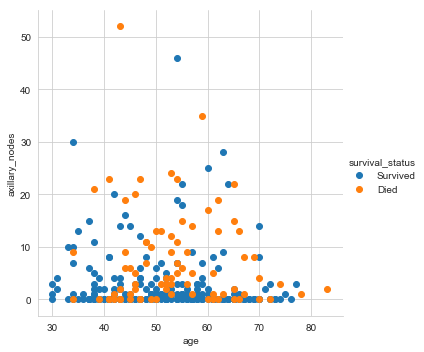

In [10]:
# 2-D Scatter plot with color-coding to indicate survival status.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(plt.scatter, "age", "axillary_nodes") \
   .add_legend();
plt.show();

### Observation(s)

* Most of the patients have 0 auxillary nodes regardless of the age group. <br>

### Pair Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


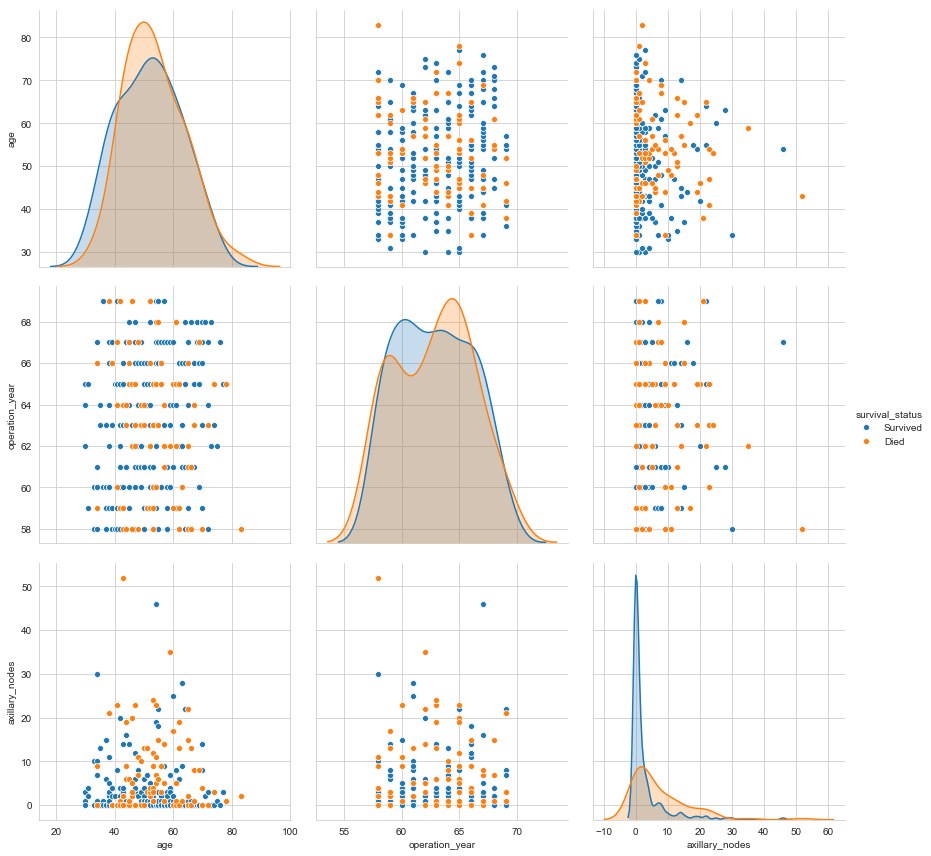

In [11]:
# Visualization of multiple 2-D scatter plots for each combination of features. 
# # pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status",vars=['age','operation_year','axillary_nodes'] ,size=4);
plt.show()

### Observation(s)

* The combination of age of the patient and the number of axillary nodes is useful to predict the survival status after 5 years.
* The survival rate is very high(roughly 90%) for patients having age < 40 and the number of axillary nodes < 20.

## Univariate Analysis

### Histogram, PDF and CDF

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


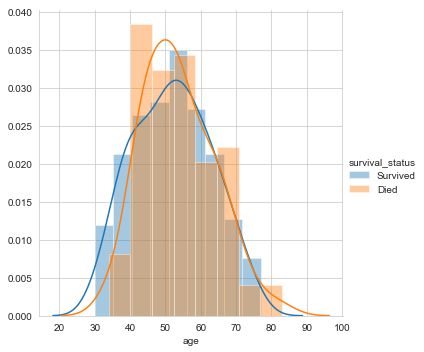

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


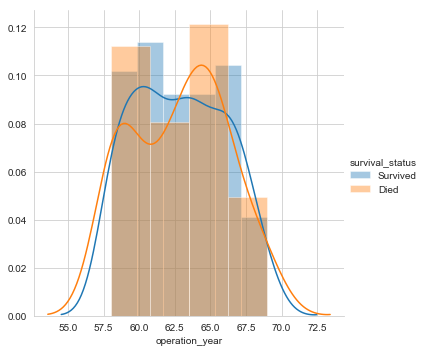

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


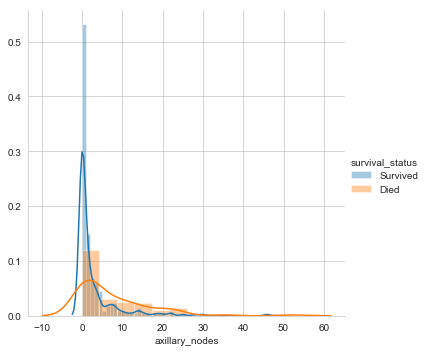

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


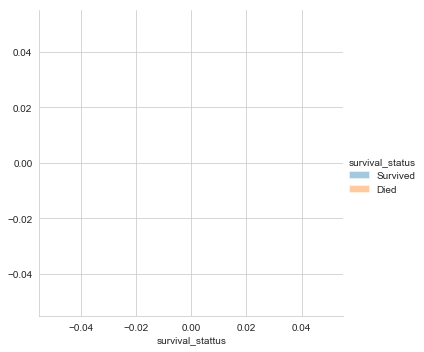

In [12]:
#Collect the data into two survival states i.e. survived and died for univariate analysis.
haberman_survived_data = haberman.loc[haberman['survival_status'] == 'Survived']
haberman_died_data = haberman.loc[haberman['survival_status'] == 'Died']

# Plot histogram,PDF for each feature.
for col in haberman.loc[:,haberman.columns!='survival_status']:
    sns.FacetGrid(haberman, hue="survival_status", size=5).map(sns.distplot, col).add_legend();
    plt.show();

### Observation(s)

* The probablity distribution function(PDF) for the people who survived and those who died different in case of axillary nodes.Hence, axillary nodes is the most important feature to predict the survival status after 5 years.
* The survival rate is extremely high for patients having less than 3 axillary nodes.

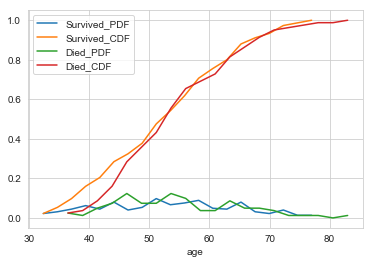

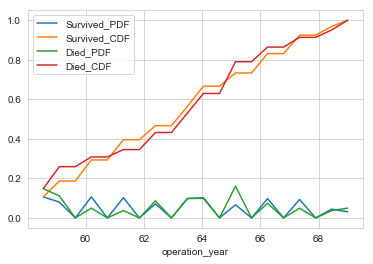

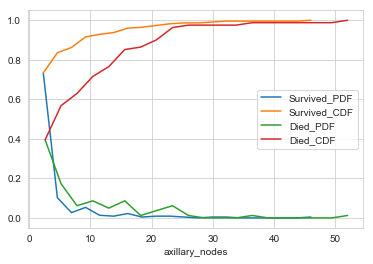

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: autodetected range of [nan, nan] is not finite

In [13]:
# Plot Cumulative Distribution Function (CDF) for both survived and died patients.
# We can visually see what percentage of survived patients have
# axillary nodes less than 3?

#Plot CDF of both survived and died patients.

for col in haberman.loc[:,haberman.columns!='survival_status']:
    counts, bin_edges = np.histogram(haberman_survived_data[col], bins=20, 
                                 density = True)
    pdf = counts/(sum(counts))
    #compute CDF
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(col)
    
    counts, bin_edges = np.histogram(haberman_died_data[col], bins=20, 
                                 density = True)
    pdf = counts/(sum(counts))
    #compute CDF
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.legend('survival_status')
    plt.legend(['Survived_PDF', 'Survived_CDF','Died_PDF', 'Died_CDF'])
    plt.xlabel(col)
    plt.show();


### Observation(s)

* Patients who didn't survive typically exhibit a behaviour of having higher number of axillary nodes on average than the ones who did. More than 75% of the patients who survived had less than 3 axillary nodes.
* None of the patients having axillary nodes > 46 survived.
* None of the patients aged older than 76-77 years survived.
* The year of operation is the least useful feature towards classification of survival status of patients.

## High Level Statistics

In [14]:
# Statistics of the entire dataset.
haberman.describe()

,age,operation_year,axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [15]:
# Statistics of the people who survived.
haberman_survived_data.describe()

,age,operation_year,axillary_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [16]:
# Statistics of the people who didn't survive
haberman_died_data.describe()

,age,operation_year,axillary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


In [17]:
# Compute the median absolute deviation to gauge the spread of the distributions effectively.
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_survived_data["axillary_nodes"]))
print(robust.mad(haberman_died_data["axillary_nodes"]))


Median Absolute Deviation
0.0
5.930408874022408


### Observation(s)

* All the patients aged less than 34 years at the time of surgery survived regardless of the number of axillary nodes.
* Most of the patients who had undergone surgery were aged between 42-60 years.
* The majority of the surgeries were performed between 1960 - 1966.
* The spread of the distribution in case of axillary nodes is larger for the patients who didn't survive.

## Box Plot and Whiskers

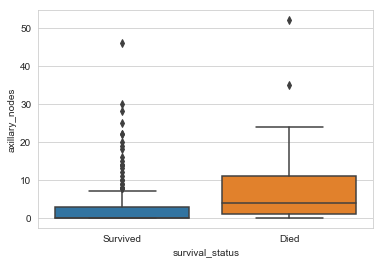

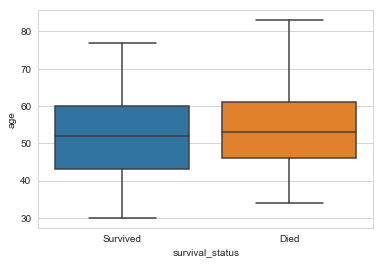

In [18]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

#IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='survival_status',y='axillary_nodes', data=haberman)
plt.show()

sns.boxplot(x='survival_status',y='age', data=haberman)
plt.show()

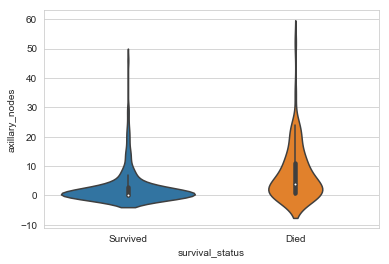

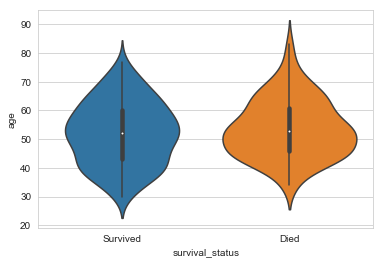

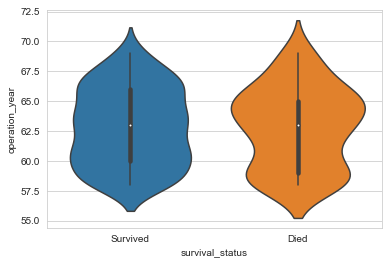

In [19]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='survival_status',y='axillary_nodes', data=haberman)
plt.show()

sns.violinplot(x='survival_status',y='age', data=haberman)
plt.show()

sns.violinplot(x='survival_status',y='operation_year', data=haberman)
plt.show()

### Observation(s)

* The year of operation has no useful effect on the survival status.
* The denser portions of the violin plot of axillary nodes indicate that having a large number of axillary nodes vastly decreases the chances of surviving after 5 years. 50% of the people who didn't survive had axillary nodes > = 4.

## Summary of the findings via various plots.

* Patients who didn't survive typically exhibit a behaviour of having higher number of axillary nodes on average than the ones who did. More than 75% of the patients who survived had less than 3 axillary nodes.
* The probablity distribution function(PDF) for the people who survived and those who died different in case of axillary nodes.Hence, axillary nodes is the most important feature to predict the survival status after 5 years.
* The spread of the distribution in case of axillary nodes is larger for the patients who didn't survive.
* 50% of the people who didn't survive had axillary nodes > = 4.
* None of the patients having axillary nodes > 46 survived.
* None of the patients aged older than 76-77 years survived.
* The combination of age of the patient and the number of axillary nodes is useful to predict the survival status after 5 years.
* The survival rate is very high(roughly 90%) for patients having age < 40 and the number of axillary nodes < 20.
* Most of the patients have 0 auxillary nodes regardless of the age group.
* The year of operation is the least useful feature towards classification of survival status of patients.
* All the patients aged less than 34 years at the time of surgery survived regardless of the number of axillary nodes.
* Most of the patients who had undergone surgery were aged between 42-60 years.
* The majority of the surgeries were performed between 1960 - 1966.